# Exploratoy Data Analysis, Cleaning, Attribute Derrivation

The purpose of this notebook was to explore our many datasets and try to clean and manipulate it to answer some of our interesting questions about the data. This file was used as a bit of a "playground" and while not all of the code within ended up being used, it helped us shape our data into a useful format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('./DATA/cl4.csv')
# 22 seconds

In [4]:
df['Vehicle Make'].value_counts()

Vehicle Make
HONDA    1547202
TOYOT    1469911
FORD     1200944
NISSA    1108092
CHEVR     666695
          ...   
BMX            1
HO/MA          1
KRYST          1
EZLD           1
CANY           1
Name: count, Length: 1983, dtype: int64

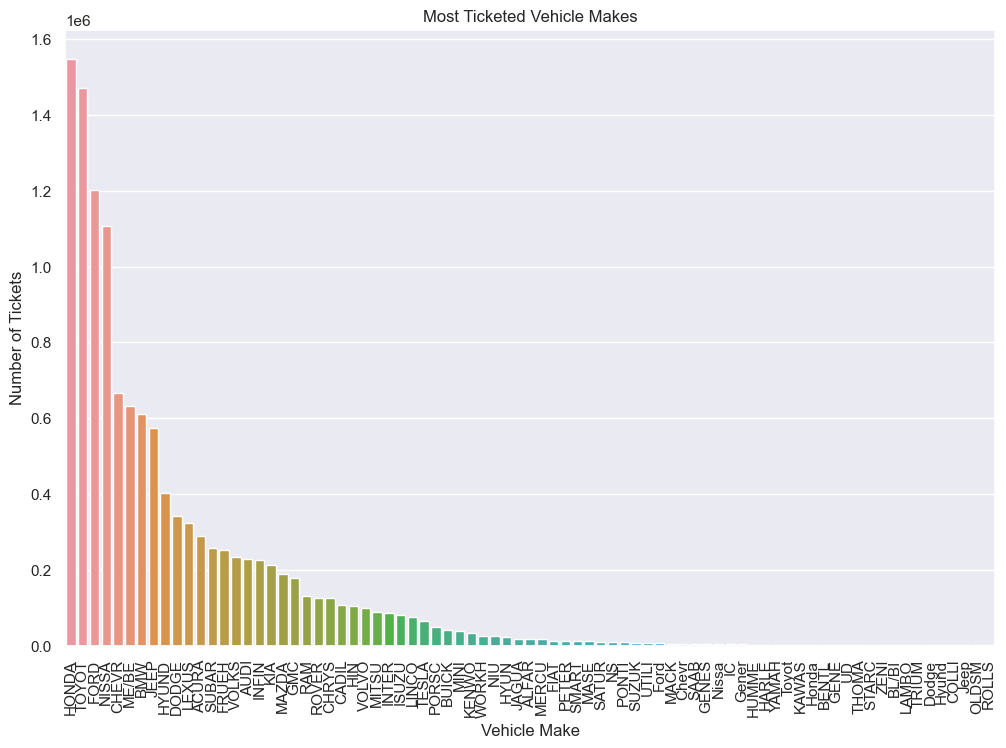

In [5]:
def plot_most_ticketed_vehicle_makes(df, threshold=1000):
    # Filter out vehicle makes that appear less than the threshold
    filtered_counts = df['Vehicle Make'].value_counts()
    filtered_counts = filtered_counts[filtered_counts >= threshold]

    # Create a new dataframe with the filtered counts
    filtered_df = pd.DataFrame({'Vehicle Make': filtered_counts.index, 'Count': filtered_counts.values})

    # Sort the dataframe by count in descending order
    sorted_filtered_df = filtered_df.sort_values(by='Count', ascending=False)

    # Plot the results using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(data=sorted_filtered_df, x='Vehicle Make', y='Count')
    plt.title('Most Ticketed Vehicle Makes')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=90)
    plt.show()

# Use the function with your dataframe
plot_most_ticketed_vehicle_makes(df)

In [6]:
final = pd.read_csv("final_data.csv")
# 27 seconds

In [7]:
final.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Vehicle Expiration Date,Violation Location,Violation Precinct,Violation Time,Violation County,House Number,Street Name,Vehicle Color,Vehicle Year,Violation Description,Standardized Vehicle Body Type,Month
0,JEB5683,NY,PAS,2021-06-25,40,VAN,FORD,P,20221004,88.0,88,130.0,Brooklyn,100,NORTH PORTLAND AVE,GRAY,2007,NaN,Van,6
1,JAN2986,NY,PAS,2021-06-25,20,SUBN,DODGE,P,20221203,88.0,88,225.0,Brooklyn,398,AUBURN PL,BLUE,2007,NaN,SUV,6
2,RD1Y5N,MO,PAS,2021-06-16,98,SDN,TOYOT,P,0,83.0,83,1805.0,Brooklyn,22,JEFFERSON ST,TAN,2001,NaN,Sedan,6
3,T503814C,NY,OMT,2021-07-04,40,TAXI,HONDA,P,20210831,83.0,83,2258.0,Brooklyn,25,STANHOPE ST,WHITE,2020,NaN,Unknown,7
4,JLN5490,NY,PAS,2021-06-28,98,SDN,HONDA,P,20211021,83.0,83,1120.0,Brooklyn,234,MENEHAN ST,GRAY,2015,NaN,Sedan,6


In [8]:
plates_dict = {
    "PAS": "Passenger Vehicles",
    "SRF": "Personalized Plates, Various Professional Registrations",
    "COM": "Commercial Vehicles",
    "MOT": "Motorcycles",
    "HSM": "Historical Motorcycles",
    "LMA": "Limited Use Motorcycles Class A",
    "LMB": "Limited Use Motorcycles Class B",
    "LMC": "Limited Use Motorcycles Class C",
    "BOB": "Birthplace of Baseball",
    "ORG": "Organizations and Causes (Passenger)",
    "ORC": "Organizations and Causes (Commercial)",
    "RGL": "Regional Series (Passenger)",
    "RGC": "Regional Series (Commercial)",
    "SPO": "Sports Series (Passenger)",
    "CSP": "Sports Series (Commercial)",
    "HIR": "Hearse Coach",
    "CHC": "Household Carrier Commercial",
    "THC": "Household Carrier Tractor",
    "OML": "Livery Omnibus",
    "OMT": "Taxi/Limo/Motor Omnibus",
    "OMF": "Public Service Omnibus",
    "OMR": "Regular Omnibus (Standard)",
    "OMV": "Regular Omnibus (Personalized)",
    "TRC": "Regular Tractor",
    "SCL": "School Car",
    "OMS": "Special Omnibus Rentals (Hired Transport)",
    "TOW": "Tow Truck",
    "VPL": "Van Pool",
    "ARG": "Air National Guard",
    "AYG": "Army National Guard",
    "CMH": "Congressional Medal of Honor",
    "FPW": "Former Prisoner of War",
    "GSM": "Gold Star Mothers",
    "JWV": "Jewish War Veterans",
    "MCL": "Marine Corp League",
    "NLM": "Naval Militia",
    "HAM": "Ham Radio Operator (Passenger)",
    "HAC": "Ham Radio Operator (Commercial)",
    "SOS": "Survivors of the Shield",
    "VAS": "Volunteer Ambulance Services",
    "EDU": "Educator",
    "MED": "Medical Doctor",
    "SRN": "New York Press/Television/Court",
    "AGR": "Agricultural",
    "ATV": "All-Terrain Vehicle",
    "ATD": "ATV Dealer",
    "DLR": "Automobile Dealer",
    "MCD": "Motorcycle Dealer",
    "FAR": "Farm",
    "HIS": "Historical",
    "LUA": "Limited Use Auto",
    "LOC": "Locomotive (40 and 8 Train)",
    "BOT": "Motorboat",
    "SNO": "Snowmobile",
    "SPC": "Special Purpose Commercial",
    "HOU": "House Coach",
    "LTR": "Light Trailer",
    "TRL": "Regular Trailer",
    "SEM": "Semi-Trailer",
    "WUG": "World University Games",
    "CME": "Coroner / Medical Examiner",
    "CBS": "County Board of Supervisors",
    "CCK": "County Clerk",
    "CLG": "County Legislators",
    "JCA": "Court of Appeals",
    "JCL": "Court of Claims",
    "SUP": "Supreme Court Justice",
    "JSC": "Supreme Court-Appellate Division",
    "USC": "US Congress",
    "USS": "US Senate",
}

In [9]:
final['Plate Description'] = final['Plate Type'].map(plates_dict)

plate_categories = {
    "PAS": "Passenger/Personalized",
    "SRF": "Passenger/Personalized",
    "COM": "Commercial",
    "OMT": "Private Transport",
    "OMS": "Private Transport",
}

missing_codes = set(plates_dict.keys()) - set(plate_categories.keys())
for code in missing_codes:
    plate_categories[code] = "Other"

final['Plate Categories'] = final['Plate Type'].map(plate_categories)

final['Plate Categories'].value_counts()

Plate Categories
Passenger/Personalized    10150463
Commercial                 1506378
Private Transport           616257
Other                       194645
Name: count, dtype: int64

### Answering question of which passenger vehicle makes are ticketed most

In [10]:
passenger_df = final[final["Plate Type"] == "PAS"]

In [11]:
passenger_df.shape

(9977106, 22)

In [12]:
pass_tickets = passenger_df[passenger_df['Registration State'] == 'NY'].groupby('Vehicle Make')['Plate ID'].count().reset_index()
pass_tickets = pass_tickets.rename(columns={'Plate ID': 'Number of Tickets'})
pass_tickets = pass_tickets.sort_values(by='Number of Tickets', ascending=False)
total_tickets = pass_tickets['Number of Tickets'].sum()

pass_tickets['Percent of Tickets'] = pass_tickets['Number of Tickets'] / total_tickets * 100

In [13]:
pass_tickets.head(10)

,Vehicle Make,Number of Tickets,Percent of Tickets
273,HONDA,1307625,15.055804
693,TOYOT,1002395,11.541430
546,NISSA,876309,10.089694
206,FORD,544747,6.272138
90,BMW,501900,5.778803
339,JEEP,491434,5.658299
471,ME/BE,460910,5.306851
127,CHEVR,374455,4.311420
304,HYUND,320980,3.695717
400,LEXUS,274879,3.164917


In [14]:
# https://data.ny.gov/Transportation/Vehicle-Makes-and-Body-Types-Most-Popular-in-New-Y/3pxy-wy2i

veh = pd.read_csv("./DATA/Vehicle_Makes_and_Body_Types__Most_Popular_in_New_York_State.csv")
veh.shape

(41851, 4)

In [15]:
veh = veh[veh['Record Type'] == 'VEH']
veh.head(10)

,Record Type,Make,Body Type,Registration Class
0,VEH,HONDA,SUBN,640483
1,VEH,TOYOT,SUBN,623797
2,VEH,JEEP,SUBN,593851
3,VEH,TOYOT,4DSD,512285
4,VEH,CHEVR,SUBN,454853
5,VEH,HONDA,4DSD,452822
6,VEH,FORD,SUBN,447817
7,VEH,SUBAR,SUBN,425417
8,VEH,CHEVR,PICK,356589
9,VEH,NISSA,SUBN,354287


In [16]:
veh.shape

(13712, 4)

In [17]:
vehicle_codes = ["CONV", "SEDN", "SUBN", "4DSD", "2DSD", "PICK", "VAN"]
veh = veh[veh['Body Type'].isin(vehicle_codes)]
veh.head()

,Record Type,Make,Body Type,Registration Class
0,VEH,HONDA,SUBN,640483
1,VEH,TOYOT,SUBN,623797
2,VEH,JEEP,SUBN,593851
3,VEH,TOYOT,4DSD,512285
4,VEH,CHEVR,SUBN,454853


In [18]:
veh.shape

(3294, 4)

In [19]:
# group by Make and sum Registration Class
veh_sum = veh.groupby('Make')['Registration Class'].sum().reset_index()

# sort by Registration Class in descending order
veh_sum = veh_sum.sort_values(by='Registration Class', ascending=False).reset_index()
veh_sum = veh_sum.drop(columns=['index'])

veh_sum = veh_sum.rename(columns={'Make': 'Vehicle Make', 'Registration Class': 'Total Registrations'})

In [20]:
veh_sum.head()

,Vehicle Make,Total Registrations
0,TOYOT,1285454
1,CHEVR,1170696
2,HONDA,1161613
3,FORD,1118106
4,NISSA,684083


In [21]:
veh_sum.shape

(1915, 2)

In [22]:
make_regs = veh_sum
make_tickets = pass_tickets
total_regs = make_regs['Total Registrations'].sum()
make_regs['Percent of Registrations'] = make_regs['Total Registrations'] / total_regs * 100

In [23]:
print(make_regs["Percent of Registrations"].sum())
print(make_tickets["Percent of Tickets"].sum())

100.00000000000001
100.00000000000001


In [24]:
merged = make_regs.merge(make_tickets, on='Vehicle Make', how='inner')

In [25]:
merged['Disproportionality'] = (merged['Percent of Tickets'] / merged['Percent of Registrations']) / ((100-merged['Percent of Tickets']) / (100-merged['Percent of Registrations']))

In [26]:
mf = merged[(merged["Percent of Registrations"] > 0.1) & (merged["Percent of Tickets"] > 0.1)]
mf = mf.sort_values(by='Disproportionality', ascending=False)

In [27]:
mf.head(10)

,Vehicle Make,Total Registrations,Percent of Registrations,Number of Tickets,Percent of Tickets,Disproportionality
23,INFIN,80367,0.764498,184073,2.119390,2.810638
9,BMW,279727,2.660927,501900,5.778803,2.243590
10,ME/BE,268341,2.552617,460910,5.306851,2.139454
17,ACURA,161980,1.540849,250135,2.880018,1.894884
15,LEXUS,200176,1.904191,274879,3.164917,1.683718
18,AUDI,139861,1.330440,192363,2.214840,1.679799
4,NISSA,684083,6.507398,876309,10.089694,1.612272
2,HONDA,1161613,11.049943,1307625,15.055804,1.426778
29,MINI,31693,0.301482,33083,0.380913,1.264474
22,VOLVO,87231,0.829792,81081,0.933555,1.126225


In [28]:
make_categories = {
    "INFIN": "ASIAN",
    "BMW": "EUROPEAN",
    "ME/BE": "EUROPEAN",
    "ACURA": "ASIAN",
    "LEXUS": "ASIAN",
    "AUDI": "EUROPEAN",
    "NISSA": "ASIAN",
    "HONDA": "ASIAN",
    "MINI": "EUROPEAN",
    "VOLVO": "EUROPEAN",
    "JAGUA": "EUROPEAN",
    "VOLKS": "EUROPEAN",
    "MITSU": "ASIAN",
    "PORSC": "EUROPEAN",
    "TESLA": "AMERICAN",
    "MAZDA": "ASIAN",
    "JEEP": "AMERICAN",
    "CADIL": "AMERICAN",
    "DODGE": "AMERICAN",
    "CHRYS": "AMERICAN",
    "TOYOT": "ASIAN",
    "HYUND": "ASIAN",
    "LINCO": "AMERICAN",
    "KIA": "ASIAN",
    "SATUR": "AMERICAN",
    "MERCU": "AMERICAN",
    "FORD": "AMERICAN",
    "SUBAR": "ASIAN",
    "GMC": "AMERICAN",
    "CHEVR": "AMERICAN",
    "BUICK": "AMERICAN",
    "RAM": "AMERICAN",
}

mf['Make Country'] = mf['Vehicle Make'].map(make_categories)

In [29]:
mf.head(10)

,Vehicle Make,Total Registrations,Percent of Registrations,Number of Tickets,Percent of Tickets,Disproportionality,Make Country
23,INFIN,80367,0.764498,184073,2.119390,2.810638,ASIAN
9,BMW,279727,2.660927,501900,5.778803,2.243590,EUROPEAN
10,ME/BE,268341,2.552617,460910,5.306851,2.139454,EUROPEAN
17,ACURA,161980,1.540849,250135,2.880018,1.894884,ASIAN
15,LEXUS,200176,1.904191,274879,3.164917,1.683718,ASIAN
18,AUDI,139861,1.330440,192363,2.214840,1.679799,EUROPEAN
4,NISSA,684083,6.507398,876309,10.089694,1.612272,ASIAN
2,HONDA,1161613,11.049943,1307625,15.055804,1.426778,ASIAN
29,MINI,31693,0.301482,33083,0.380913,1.264474,EUROPEAN
22,VOLVO,87231,0.829792,81081,0.933555,1.126225,EUROPEAN


In [30]:
mf.to_csv("./DATA/make_tickets.csv", index=False)

### Violations by borough normalized by population

In [31]:
# Borough Populations
# https://www.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/population-estimates/current-population-estimates-2022.pdf?r=a
# Page 4
final['Violation County'].unique()

county_populations = {
    'Brooklyn': 2590516,
    'Bronx': 1379946,
    'Manhattan': 1596273,
    'Queens': 2278029,
    'Staten Island': 491133,
}

county_data = final['Violation County'].value_counts().reset_index()
county_data.columns = ['County', 'Parking Violations']
county_data['County Populations'] = county_data['County'].map(county_populations)
county_data['Violation Ratio'] = county_data['Parking Violations'] / county_data['County Populations']
county_data

county_data.to_csv('county_data_with_ratio.csv', index=False)